# CNN Using Transfer Learning
- Here we are Using VGG16

In [ ]:
import tensorflow as tf
import os
from pathlib import Path
import urllib.request as request
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%cd /content/drive/MyDrive/Deep Learning/Computer vision/CNN_Architecture/Coding

/content/drive/MyDrive/Deep Learning/Computer vision/CNN_Architecture/Coding


In [ ]:
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/train/cats/
  inflating: cats_and_dogs_filtered/train/cats/cat.0.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.1.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.10.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.100.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.101.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.102.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.103.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.104.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.105.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.106.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.107.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.108.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.109.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.11.jpg  
  inflating: cats_and_dogs_filtered/tra

In [ ]:
ls

cats_and_dogs_filtered/  Dataset.zip  VGG16.ipynb


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (300 , 300)

In [ ]:
## Download VGG 16
model = tf.keras.applications.VGG16(
    include_top=True, weights="imagenet", input_tensor=None, input_shape=None, classes=1000 
)

553476096/553467096 [==============================] - 3s 0us/step


Like Wise we Download other model like resenet , mobilenet, inceptions , etc...

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.layers[1].padding

'same'

In [ ]:
datagen_kwargs = dict(rescale=1./255, validation_split=0.20)

dataflow_kwargs = dict(target_size=IMAGE_SIZE, batch_size=BATCH_SIZE)  ## Here we Give Target Size & Batch Size

In [ ]:
ls

cats_and_dogs_filtered/  Dataset.zip  VGG16.ipynb  Vgg16_TrainedModel.h5


In [ ]:
 main_data_dir = Path("./cats_and_dogs_filtered/train/")
 main_data_dir

PosixPath('cats_and_dogs_filtered/train')

In [ ]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)


valid_generator = valid_datagen.flow_from_directory(
    main_data_dir, subset="validation", shuffle=False, **dataflow_kwargs)


do_data_augmentation = False

if do_data_augmentation:
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotational_range=40,
        horizontal_flip=True,
        width_shift_range=0.2, 
        height_shift_range=0.2, 
        shear_range=0.2, 
        zoom_range=0.2, 
        **datagen_kwargs)
else:
    train_datagen = valid_datagen

train_generator = train_datagen.flow_from_directory(
    main_data_dir, subset="training", shuffle=True, **dataflow_kwargs
)

Found 400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [ ]:
train_generator[0]## See One Batch Contains 32 Images

(array([[[[0.6627451 , 0.8470589 , 0.32941177],
          [0.627451  , 0.81568635, 0.28627452],
          [0.61960787, 0.8078432 , 0.26666668],
          ...,
          [0.7725491 , 0.64705884, 0.54901963],
          [0.93725497, 0.8352942 , 0.74509805],
          [0.8941177 , 0.8000001 , 0.7058824 ]],
 
         [[0.6431373 , 0.8313726 , 0.3019608 ],
          [0.60784316, 0.7960785 , 0.2627451 ],
          [0.6039216 , 0.7960785 , 0.24313727],
          ...,
          [0.8862746 , 0.7607844 , 0.67058825],
          [0.9294118 , 0.82745105, 0.7372549 ],
          [0.89019614, 0.80392164, 0.7137255 ]],
 
         [[0.6392157 , 0.8196079 , 0.2392157 ],
          [0.62352943, 0.80392164, 0.21568629],
          [0.61960787, 0.8000001 , 0.21176472],
          ...,
          [0.9725491 , 0.86666673, 0.7843138 ],
          [0.909804  , 0.82745105, 0.74509805],
          [0.91372555, 0.8431373 , 0.76470596]],
 
         ...,
 
         [[0.40000004, 0.6392157 , 0.        ],
          [0.42352

In [ ]:
pixels = 300

## Here We Take Download VGG16 Using TopLayer


In [ ]:
RGB_IMAGE_SIZE = (pixels, pixels, 3)


vgg = tf.keras.applications.vgg16.VGG16(
    input_shape=RGB_IMAGE_SIZE,
    weights="imagenet",
    include_top=False
)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

## Check the Layers are  Trainable or Not

In [ ]:
for layer in vgg.layers:
    print(f"{layer.name:20s}: {layer.trainable}")

input_1             : True
block1_conv1        : True
block1_conv2        : True
block1_pool         : True
block2_conv1        : True
block2_conv2        : True
block2_pool         : True
block3_conv1        : True
block3_conv2        : True
block3_conv3        : True
block3_pool         : True
block4_conv1        : True
block4_conv2        : True
block4_conv3        : True
block4_pool         : True
block5_conv1        : True
block5_conv2        : True
block5_conv3        : True
block5_pool         : True


In [ ]:
## Freeze all the Layers as False
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
for layer in vgg.layers:
    print(f"{layer.name:20s}: {layer.trainable}")

input_1             : False
block1_conv1        : False
block1_conv2        : False
block1_pool         : False
block2_conv1        : False
block2_conv2        : False
block2_pool         : False
block3_conv1        : False
block3_conv2        : False
block3_conv3        : False
block3_pool         : False
block4_conv1        : False
block4_conv2        : False
block4_conv3        : False
block4_pool         : False
block5_conv1        : False
block5_conv2        : False
block5_conv3        : False
block5_pool         : False


In [ ]:
vgg.output

<KerasTensor: shape=(None, 9, 9, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
model.summary()  ## This is the Model with 1000 classes , so we need To Delete the Model

In [ ]:
## Delete the Full PreTrained Model with 1000 Classes
del model

In [ ]:
## Here we Initialize the Model With Our 2 outcomes
CLASSES = 2
x = tf.keras.layers.Flatten()(vgg.output)
prediction = tf.keras.layers.Dense(CLASSES, activation="softmax")(x)

model = tf.keras.models.Model(inputs=vgg.input, outputs = prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [ ]:
EPOCHS = 10

history = model.fit(
    train_generator, epochs=EPOCHS, validation_data=valid_generator
)

Epoch 1/10
50/50 [==============================] - 744s 15s/step - loss: 15.1620 - accuracy: 0.6637 - val_loss: 4.9979 - val_accuracy: 0.7775
Epoch 2/10
50/50 [==============================] - 20s 390ms/step - loss: 7.4824 - accuracy: 0.7975 - val_loss: 63.6789 - val_accuracy: 0.5025
Epoch 3/10
50/50 [==============================] - 21s 413ms/step - loss: 8.8324 - accuracy: 0.7881 - val_loss: 2.4840 - val_accuracy: 0.8875
Epoch 4/10
50/50 [==============================] - 20s 404ms/step - loss: 1.9761 - accuracy: 0.9131 - val_loss: 2.0435 - val_accuracy: 0.8900
Epoch 5/10
50/50 [==============================] - 19s 388ms/step - loss: 3.2485 - accuracy: 0.8806 - val_loss: 3.4689 - val_accuracy: 0.8625
Epoch 6/10
50/50 [==============================] - 20s 391ms/step - loss: 3.8461 - accuracy: 0.8631 - val_loss: 3.7004 - val_accuracy: 0.8625
Epoch 7/10
50/50 [==============================] - 20s 400ms/step - loss: 1.1149 - accuracy: 0.9375 - val_loss: 6.5170 - val_accuracy: 0.790

In [ ]:
model.save("Vgg16_TrainedModel.h5")

In [ ]:
ls

cats_and_dogs_filtered/  Dataset.zip  VGG16.ipynb  Vgg16_TrainedModel.h5


In [ ]:
label_map = {val: key for key, val in train_generator.class_indices.items()}
label_map

{0: 'cats', 1: 'dogs'}

In [ ]:
pwd

'/content/drive/MyDrive/Deep Learning/Computer vision/CNN_Architecture/Coding'

## Predict One Sample

In [ ]:
test_img = plt.imread("./cats_and_dogs_filtered/train/cats/cat.100.jpg")
test_img.shape

(499, 403, 3)

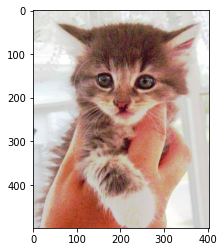

In [ ]:
plt.imshow(test_img)

In [ ]:
resized_img = tf.image.resize(test_img, (300, 300))
resized_img.shape

TensorShape([300, 300, 3])

In [ ]:
## add Batch as 0
input_data = tf.expand_dims(resized_img, axis=0)
input_data.shape


TensorShape([1, 300, 300, 3])

In [ ]:
pred = model.predict(input_data)
pred

array([[1., 0.]], dtype=float32)

In [ ]:
argmax = tf.argmax(pred[0]).numpy()

In [ ]:
label_map[argmax]

'cats'

It Predict Cats Correctly

In [ ]:
ls

cats_and_dogs_filtered/  Dataset.zip  VGG16.ipynb  Vgg16_TrainedModel.h5


## Load the Saved Model

In [ ]:
loaded_model = tf.keras.models.load_model("./Vgg16_TrainedModel.h5")

In [ ]:
preprocessd_img= tf.keras.applications.vgg16.preprocess_input(resized_img)  ## it is Preprocess in the Vgg16 Model
preprocessd_img.shape

TensorShape([300, 300, 3])

**The Preprocessing in VGG16**
- Subtracing the mean RGB value computed on the training set from each pixcel 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


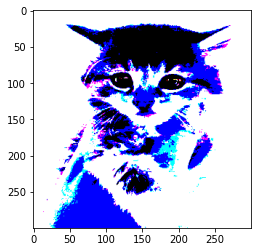

In [ ]:
plt.imshow(preprocessd_img)

**The Image is Different After Subtracing the RGB mean value**

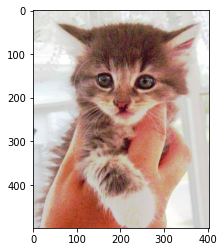

In [ ]:
plt.imshow(test_img)